### Import Libraries

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Load Datasets

## Monthly Datasets

In [68]:
months = pd.read_csv('./Data1/1.3.csv')
months.head()

,PERMNO,Date,Ticker,Company Name,Price,Shares Outstanding,Return
0,87432,20000131,A,AGILENT TECHNOLOGIES INC,66.1875,452000.0,-0.143897
1,87432,20000229,A,AGILENT TECHNOLOGIES INC,103.8750,452000.0,0.569405
2,87432,20000331,A,AGILENT TECHNOLOGIES INC,104.0000,452000.0,0.001203
3,87432,20000428,A,AGILENT TECHNOLOGIES INC,88.6250,452000.0,-0.147837
4,87432,20000531,A,AGILENT TECHNOLOGIES INC,73.6250,452000.0,-0.169252


## Fundamental Datasets

In [69]:
fundamentals = pd.read_csv("./Data1/2.3.csv")
fundamentals.head()

,PERMNO,Date,Ticker,Company Name,Total Assets,Total Liabilities,Stockholders Equity
0,87432,20000131,A,AGILENT TECHNOLOGIES INC,7107.0,2621.0,NaN
1,87432,20000430,A,AGILENT TECHNOLOGIES INC,7321.0,2679.0,NaN
2,87432,20000731,A,AGILENT TECHNOLOGIES INC,7827.0,2925.0,NaN
3,87432,20001031,A,AGILENT TECHNOLOGIES INC,8425.0,3160.0,NaN
4,87432,20010131,A,AGILENT TECHNOLOGIES INC,9208.0,3667.0,NaN


In [70]:
# delete repeated columns
del fundamentals['Company Name']

# Equity = Assets - Liabilities
fundamentals['Total Equity'] = fundamentals['Total Assets'] - fundamentals['Total Liabilities']

fundamentals.head()

,PERMNO,Date,Ticker,Total Assets,Total Liabilities,Stockholders Equity,Total Equity
0,87432,20000131,A,7107.0,2621.0,NaN,4486.0
1,87432,20000430,A,7321.0,2679.0,NaN,4642.0
2,87432,20000731,A,7827.0,2925.0,NaN,4902.0
3,87432,20001031,A,8425.0,3160.0,NaN,5265.0
4,87432,20010131,A,9208.0,3667.0,NaN,5541.0


# Data Processing

In [71]:
# Keep the date same in order for further matching
# Eliminate "day" -> /100 and transform into integers
months['Date'] = (months['Date']/100).astype('int')
fundamentals['Date'] = (fundamentals['Date']/100).astype('int')

months['Date'] = months['Date'].astype('str')
fundamentals['Date'] = fundamentals['Date'].astype('str')
# months['Date'] = pd.to_datetime(months['Date'])
# fundamentals['Date'] = pd.to_datetime(fundamentals['Date'])

In [72]:
# Set "PERMNO" and "date" as index
months.set_index(['PERMNO','Date'], inplace = True)
months.head()

Ticker              Company Name     Price  Shares Outstanding  \
PERMNO Date                                                                    
87432  200001      A  AGILENT TECHNOLOGIES INC   66.1875            452000.0   
       200002      A  AGILENT TECHNOLOGIES INC  103.8750            452000.0   
       200003      A  AGILENT TECHNOLOGIES INC  104.0000            452000.0   
       200004      A  AGILENT TECHNOLOGIES INC   88.6250            452000.0   
       200005      A  AGILENT TECHNOLOGIES INC   73.6250            452000.0   

                 Return  
PERMNO Date              
87432  200001 -0.143897  
       200002  0.569405  
       200003  0.001203  
       200004 -0.147837  
       200005 -0.169252

In [73]:
fundamentals.set_index(['PERMNO','Date'], inplace = True)
fundamentals.head()

Ticker  Total Assets  Total Liabilities  Stockholders Equity  \
PERMNO Date                                                                  
87432  200001      A        7107.0             2621.0                  NaN   
       200004      A        7321.0             2679.0                  NaN   
       200007      A        7827.0             2925.0                  NaN   
       200010      A        8425.0             3160.0                  NaN   
       200101      A        9208.0             3667.0                  NaN   

               Total Equity  
PERMNO Date                  
87432  200001        4486.0  
       200004        4642.0  
       200007        4902.0  
       200010        5265.0  
       200101        5541.0

## Merge two datasets based on Ticker and Date

In [74]:
# Merge two dataframes on two indices
# 'outer' -> union, 'inner' -> intersection
df = pd.merge(months, fundamentals, on = ['PERMNO', 'Date'], how = 'outer')

In [75]:
# Delete useless columns
del df['Ticker_y']
df.rename(columns={'Ticker_x': 'Ticker'}, inplace = True)
df

Ticker              Company Name     Price  Shares Outstanding  \
PERMNO Date                                                                    
87432  200001      A  AGILENT TECHNOLOGIES INC   66.1875            452000.0   
       200002      A  AGILENT TECHNOLOGIES INC  103.8750            452000.0   
       200003      A  AGILENT TECHNOLOGIES INC  104.0000            452000.0   
       200004      A  AGILENT TECHNOLOGIES INC   88.6250            452000.0   
       200005      A  AGILENT TECHNOLOGIES INC   73.6250            452000.0   
...              ...                       ...       ...                 ...   
89481  200912    NaN                       NaN       NaN                 NaN   
       201003    NaN                       NaN       NaN                 NaN   
       201006    NaN                       NaN       NaN                 NaN   
       201009    NaN                       NaN       NaN                 NaN   
       201012    NaN                       NaN       NaN                 NaN   

                 Return  Total Assets  Total Liabilities  Stockholders Equity  \
PERMNO Date                                                                     
87432  200001 -0.143897      7107.000           2621.000                  NaN   
       200002  0.569405           NaN                NaN                  NaN   
       200003  0.001203           NaN                NaN                  NaN   
       200004 -0.147837      7321.000           2679.000                  NaN   
       200005 -0.169252           NaN                NaN                  NaN   
...                 ...           ...                ...                  ...   
89481  200912       NaN      1032.805            943.285               89.520   
       201003       NaN      1011.135            920.663               90.472   
       201006       NaN       985.725            898.630               87.095   
       201009       NaN       972.508            886.941               85.567   
       201012       NaN       973.018            894.003               79.015   

               Total Equity  
PERMNO Date                  
87432  200001      4486.000  
       200002           NaN  
       200003           NaN  
       200004      4642.000  
       200005           NaN  
...                     ...  
89481  200912        89.520  
       201003        90.472  
       201006        87.095  
       201009        85.567  
       201012        79.015  

[347079 rows x 9 columns]

## Let's process missing values

### First, delete rows without "Company Name"

In [76]:
df.dropna(axis=0, thresh=5, inplace=True)

In [77]:
df

Ticker              Company Name     Price  Shares Outstanding  \
PERMNO Date                                                                    
87432  200001      A  AGILENT TECHNOLOGIES INC   66.1875            452000.0   
       200002      A  AGILENT TECHNOLOGIES INC  103.8750            452000.0   
       200003      A  AGILENT TECHNOLOGIES INC  104.0000            452000.0   
       200004      A  AGILENT TECHNOLOGIES INC   88.6250            452000.0   
       200005      A  AGILENT TECHNOLOGIES INC   73.6250            452000.0   
...              ...                       ...       ...                 ...   
91205  201008     ZZ                SEALY CORP    2.3700             97520.0   
       201009     ZZ                SEALY CORP    2.4400             97494.0   
       201010     ZZ                SEALY CORP    2.6300             97494.0   
       201011     ZZ                SEALY CORP    3.0200             97494.0   
       201012     ZZ                SEALY CORP    2.9200             97494.0   

                 Return  Total Assets  Total Liabilities  Stockholders Equity  \
PERMNO Date                                                                     
87432  200001 -0.143897      7107.000           2621.000                  NaN   
       200002  0.569405           NaN                NaN                  NaN   
       200003  0.001203           NaN                NaN                  NaN   
       200004 -0.147837      7321.000           2679.000                  NaN   
       200005 -0.169252           NaN                NaN                  NaN   
...                 ...           ...                ...                  ...   
91205  201008 -0.135037       964.883           1060.314              -95.431   
       201009  0.029536           NaN                NaN                  NaN   
       201010  0.077869           NaN                NaN                  NaN   
       201011  0.148289       936.757           1024.396              -87.639   
       201012 -0.033113           NaN                NaN                  NaN   

               Total Equity  
PERMNO Date                  
87432  200001      4486.000  
       200002           NaN  
       200003           NaN  
       200004      4642.000  
       200005           NaN  
...                     ...  
91205  201008       -95.431  
       201009           NaN  
       201010           NaN  
       201011       -87.639  
       201012           NaN  

[337020 rows x 9 columns]

### Assets, Equity in same quarter we fill the same values

In [78]:
def fill_values_in_same_quarter(Series):
    n = len(Series)
    Series = list(Series)  # Transform into list will be faster
    for i in range(1,n):
        if np.isnan(Series[i]):
            if np.isnan(Series[i-1]) == False:
                Series[i] = Series[i-1]
            elif np.isnan(Series[i-2]) == False:
                Series[i] = Series[i-2]
    Series = pd.Series(Series)  # Go back to pd.Series so that can add into dataframe           
    return Series

In [79]:
# We have to first break index and transform them into columns
df.reset_index(inplace=True)

In [80]:
df['Total Assets'] = fill_values_in_same_quarter(df['Total Assets'])
df['Total Liabilities'] = fill_values_in_same_quarter(df['Total Liabilities'])
df['Total Equity'] = fill_values_in_same_quarter(df['Total Equity'])

# Actually it's useless anymore, but any way, let's fill it
df['Stockholders Equity'] = fill_values_in_same_quarter(df['Stockholders Equity'])

In [81]:
df

,PERMNO,Date,Ticker,Company Name,Price,Shares Outstanding,Return,Total Assets,Total Liabilities,Stockholders Equity,Total Equity
0,87432,200001,A,AGILENT TECHNOLOGIES INC,66.1875,452000.0,-0.143897,7107.000,2621.000,NaN,4486.000
1,87432,200002,A,AGILENT TECHNOLOGIES INC,103.8750,452000.0,0.569405,7107.000,2621.000,NaN,4486.000
2,87432,200003,A,AGILENT TECHNOLOGIES INC,104.0000,452000.0,0.001203,7107.000,2621.000,NaN,4486.000
3,87432,200004,A,AGILENT TECHNOLOGIES INC,88.6250,452000.0,-0.147837,7321.000,2679.000,NaN,4642.000
4,87432,200005,A,AGILENT TECHNOLOGIES INC,73.6250,452000.0,-0.169252,7321.000,2679.000,NaN,4642.000
...,...,...,...,...,...,...,...,...,...,...,...
337015,91205,201008,ZZ,SEALY CORP,2.3700,97520.0,-0.135037,964.883,1060.314,-95.431,-95.431
337016,91205,201009,ZZ,SEALY CORP,2.4400,97494.0,0.029536,964.883,1060.314,-95.431,-95.431
337017,91205,201010,ZZ,SEALY CORP,2.6300,97494.0,0.077869,964.883,1060.314,-95.431,-95.431
337018,91205,201011,ZZ,SEALY CORP,3.0200,97494.0,0.148289,936.757,1024.396,-87.639,-87.639


### See the summary of df

In [82]:
df.describe()

,PERMNO,Price,Shares Outstanding,Return,Total Assets,Total Liabilities,Stockholders Equity,Total Equity
count,337020.000000,337017.000000,3.370190e+05,336808.000000,3.370200e+05,3.370200e+05,336912.000000,337020.00000
mean,69478.219524,63.584159,1.452230e+05,0.008017,2.943883e+04,2.506373e+04,6201.641101,4373.17747
std,23545.455950,1845.136787,4.797186e+05,0.128472,1.701815e+05,1.600583e+05,18703.791254,13827.19486
min,10051.000000,-1457.500000,1.000000e+00,-0.981295,1.001000e+00,0.000000e+00,-90520.000000,-90520.00000
25%,59045.000000,11.850000,1.748400e+04,-0.044680,8.441130e+02,4.283690e+02,369.876000,326.23400
50%,78935.000000,20.110000,4.193600e+04,0.006198,2.264010e+03,1.356950e+03,1076.970000,818.20000
75%,86467.000000,35.850000,1.045100e+05,0.057387,8.140000e+03,5.296823e+03,3534.232000,2591.66100
max,93427.000000,141600.000000,2.904960e+07,5.551724,3.879172e+06,3.672761e+06,257683.000000,257683.00000


In [83]:
# Price has negative values, delete
df = df[df['Price'] > 0]

# Calculation

## Objected Oriented Style - Define Class and functions

In [84]:
class Solve():
    def __init__(self, df):
        self.df = df
        
    def Calculate_book_to_equity(self):
        self.df['Book to Equity'] = self.df['Total Assets'] / self.df['Total Equity']
        
    def Build_new_df(self):
        self.df1 = self.df.copy()
        
        # Calculate each stock's market value
        self.df1['Market Value'] = self.df1['Price'] * self.df1['Shares Outstanding']
        self.df2 = self.df1.copy()
        
        # Delete useless columns
        del self.df1['Stockholders Equity']
        del self.df1['PERMNO']
        
        del self.df2['Date']
        del self.df2['Company Name']
        del self.df2['PERMNO']
        del self.df2['Stockholders Equity']
        
    def Show_dataframe(self, option):
        if option == 0:
            return self.df.head()
        elif option == 1:
            return self.df1.head()
        elif option == 2:
            return self.df2.head()
               
    def Show_summary_statistics_times(self):
        pd.set_option('display.max_columns', None)
        #self.df1 = self.df.copy()
        return self.df1.groupby('Date').describe(percentiles = [.5])
           
    def Show_summary_statistics_stocks(self):
        pd.set_option('display.max_columns', None)
        return self.df2.groupby('Ticker').describe(percentiles = [.5])
    
    def Calculate_equal_weighted_return(self):
        self.Equal_Weighted_Return = self.df.groupby(['Date'])['Return'].mean()
        
    def Calculate_value_weighted_return(self):        
        # Set 'Date' as index, in order to match
        self.df1.set_index('Date', inplace = True)   
        
        # Calculate Total Market Value
        MktValue = self.df1.groupby('Date')['Market Value'].sum()   
        MktValue = MktValue.to_frame()
        MktValue.rename(columns={'Market Value': 'NYSE Total Value'}, inplace = True)
        
        # Add Total Market Value into dataframe
        self.df1 = pd.merge(self.df1, MktValue, on = 'Date')
        
        # Calculate each stock's weight
        self.df1['Weight'] = self.df1['Market Value'] / self.df1['NYSE Total Value']
        self.df1['Weighted Return'] = self.df1['Weight'] * self.df1['Return']
        
        self.Value_Weighted_Return = self.df1['Weighted Return'].groupby(['Date']).sum()
        
    def Calculate_cumulative_weighted_return(self):
#         self.Cumulative_equal_weighted_return = self.Equal_Weighted_Return.cumsum()
#         self.Cumulative_value_weighted_return = self.Value_Weighted_Return.cumsum()
        self.Cumulative_equal_weighted_return = (self.Equal_Weighted_Return+1).cumprod()-1
        self.Cumulative_value_weighted_return = (self.Value_Weighted_Return+1).cumprod()-1
        
    def Plot_hist_equal_return(self):
        plt.hist(self.Equal_Weighted_Return, color='orange')
        self.Equal_Weighted_Return.plot(kind = 'hist', color = 'orange', edgecolor = 'black', label = 'histogram')
        self.Equal_Weighted_Return.plot(kind = 'kde', color = 'red', label = 'Kernel Density')
        plt.xlabel('Equal Weighted Monthly Return')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
        
    def Plot_hist_value_return(self):
        #plt.hist(self.Value_Weighted_Return, color='orange')
        self.Value_Weighted_Return.plot(kind = 'hist', color = 'orange', edgecolor = 'black', label = 'histogram')
        self.Value_Weighted_Return.plot(kind = 'kde', color = 'red', label = 'Kernel Density')
        plt.xlabel('Value Weighted Monthly Return')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
        
    def Compare_two_time_series(self):
        plt.figure(figsize=(16,8))

        plt.plot(self.Cumulative_equal_weighted_return)
        plt.plot(self.Cumulative_value_weighted_return)

        font1 = {'family' : 'Times New Roman',
                'weight' : 'normal',
                'size'   : 23}
        plt.legend(['Equal-Weighted Return', 'Value-Weighted Return'], fontsize = 'x-large')

        plt.xlabel('Time', font1)
        plt.ylabel('Cumulative NYSE Monthly Return', font1)
        plt.show()

## Create object and do calculations

In [85]:
Object = Solve(df)

Object.Calculate_book_to_equity()
Object.Build_new_df()
Object.Calculate_equal_weighted_return()
Object.Calculate_value_weighted_return()
Object.Calculate_cumulative_weighted_return()

D:\Anaconda\Setup\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Show summary statistics

In [20]:
Object.Show_summary_statistics_times()

Price                                                      \
         count       mean          std      min      50%       max   
Date                                                                 
200001  2747.0  43.094228   977.245883  0.12500  16.7500   51200.0   
200002  2731.0  40.209922   842.357555  0.23438  16.3750   44000.0   
200003  2697.0  46.954863  1101.824131  0.18750  17.3125   57200.0   
200004  2667.0  47.806928  1148.741708  0.17188  17.0000   59300.0   
200005  2653.0  46.932211  1138.064056  0.15625  17.1875   58600.0   
...        ...        ...          ...      ...      ...       ...   
201008  2403.0  74.549103  2420.579032  0.33000  17.2875  118675.0   
201009  2407.0  79.145947  2537.269227  0.23610  18.9100  124500.0   
201010  2401.0  78.040140  2434.314912  0.18880  19.4200  119300.0   
201011  2409.0  78.526117  2448.607164  0.24000  19.5600  120200.0   
201012  2431.0  79.604666  2442.572414  0.46000  20.5200  120450.0   

       Shares Outstanding                                                \
                    count           mean            std    min      50%   
Date                                                                      
200001             2747.0  101927.709501  282795.891049   10.0  30179.0   
200002             2731.0  103149.022336  284069.687765   10.0  30590.0   
200003             2697.0  104558.723396  285512.168992   10.0  31220.0   
200004             2667.0  106677.775778  290382.118349   10.0  31474.0   
200005             2653.0  111177.551074  347163.197473  144.0  31500.0   
...                   ...            ...            ...    ...      ...   
201008             2403.0  178356.998752  769360.411850  238.0  53210.0   
201009             2407.0  178371.144578  768547.121332  238.0  53253.0   
201010             2401.0  178905.260725  770744.994155  238.0  53210.0   
201011             2409.0  179615.229141  770015.419585  238.0  52856.0   
201012             2431.0  179427.936652  767010.699872  238.0  52894.0   

                    Return                                                    \
               max   count      mean       std       min       50%       max   
Date                                                                           
200001   4453740.0  2747.0 -0.020353  0.145432 -0.695652 -0.021978  1.333333   
200002   4453740.0  2731.0 -0.009098  0.170856 -0.673913 -0.022222  2.831579   
200003   4453740.0  2696.0  0.059062  0.166043 -0.730769  0.030644  1.838710   
200004   4454034.0  2667.0 -0.008015  0.131597 -0.722222 -0.004785  0.837838   
200005   9893426.0  2653.0 -0.005464  0.138535 -0.703704 -0.004673  1.081081   
...            ...     ...       ...       ...       ...       ...       ...   
201008  28973529.0  2403.0 -0.043684  0.105682 -0.529801 -0.037333  2.180198   
201009  28973529.0  2404.0  0.092780  0.099993 -0.612551  0.081629  1.325405   
201010  29049600.0  2401.0  0.033408  0.084126 -0.429153  0.025974  0.755725   
201011  29049600.0  2409.0  0.009152  0.094200 -0.455645 -0.000370  1.049724   
201012  29049600.0  2418.0  0.058226  0.101490 -0.312062  0.047370  1.583333   

       Total Assets                                                \
              count          mean            std    min       50%   
Date                                                                
200001       2747.0  30945.722745  184936.171918  1.001  2293.100   
200002       2731.0  29849.759557  181604.196643  1.001  2193.257   
200003       2697.0  22105.672511  142505.313743  1.001  1826.676   
200004       2667.0  22297.223106  143365.373573  1.001  1826.676   
200005       2653.0  22509.668984  143749.687716  1.001  1845.658   
...             ...           ...            ...    ...       ...   
201008       2403.0  35214.419353  194953.070835  1.001  2575.000   
201009       2407.0  37093.048465  205405.044069  1.001  2661.682   
201010       2401.0  37124.885611  205653.094582  1.001  2661.682   
201011       2409.0  36330.0

In [21]:
Object.Show_summary_statistics_stocks()

Price                                                    \
        count       mean        std      min      50%       max   
Ticker                                                            
A       132.0  31.917292  14.844346  13.0600  30.4800  104.0000   
AA      132.0  28.931136  12.039403   6.2300  30.6550   70.2500   
AAA      59.0  56.796102   6.799180  37.2000  57.3700   75.1300   
AAC       3.0   4.833333   0.157288   4.6875   4.8125    5.0000   
AAG       5.0  16.162500   0.742935  15.2500  16.1875   17.0625   
...       ...        ...        ...      ...      ...       ...   
ZNH     126.0  19.679848  12.472400   6.4100  16.0850   77.0100   
ZNT     124.0  35.576190  11.145983  20.0100  32.7550   69.6400   
ZQK     132.0  14.931534   8.293867   1.2500  14.3750   32.6000   
ZTR     132.0   5.226773   1.176343   3.0400   5.1200    7.4600   
ZZ       56.0   7.670714   5.580444   0.8000   5.9200   17.4800   

       Shares Outstanding                                                    \
                    count           mean            std       min       50%   
Ticker                                                                        
A                   132.0  427498.871212   54497.885992  343354.0  452272.0   
AA                  132.0  860868.984848  111358.918139  364514.0  866613.5   
AAA                  59.0    1156.525424     717.616682     150.0     773.0   
AAC                   3.0   39439.000000       8.660254   39429.0   39444.0   
AAG                   5.0   42359.600000      41.578841   42286.0   42372.0   
...                   ...            ...            ...       ...       ...   
ZNH                 126.0    3063.261905    1539.062926    1229.0    2556.5   
ZNT                 124.0   26857.596774    9294.887150   17148.0   19617.0   
ZQK                 132.0   83166.818182   47906.977792   22387.0  118549.0   
ZTR                 132.0   97726.219697   10028.761058   89733.0   92891.0   
ZZ                   56.0   92465.839286    2194.158416   90517.0   91507.0   

                  Return                                                    \
              max  count      mean       std       min       50%       max   
Ticker                                                                       
A        531000.0  132.0  0.006517  0.147992 -0.447458  0.001450  0.569405   
AA      1021442.0  132.0 -0.000258  0.115615 -0.490700  0.005131  0.287540   
AAA        2379.0   59.0  0.009810  0.094022 -0.244670 -0.001284  0.291667   
AAC       39444.0    3.0  0.040655  0.014908  0.026667  0.038961  0.056338   
AAG       42384.0    5.0 -0.008542  0.072368 -0.100694 -0.024000  0.094262   
...           ...    ...       ...       ...       ...       ...       ...   
ZNH        5681.0  126.0  0.025164  0.161171 -0.383105 -0.007547  0.547112   
ZNT       37930.0  124.0  0.011977  0.088060 -0.215763  0.011237  0.365233   
ZQK      163944.0  132.0  0.019608  0.187668 -0.548781  0.029399  0.848485   
ZTR      114595.0  132.0 -0.003604  0.041594 -0.200326  0.000000  0.121212   
ZZ        97520.0   56.0  0.010783  0.265657 -0.567568 -0.011176  1.375839   

       Total Assets                                                     \
              count          mean           std        min         50%   
Ticker                                                                   
A             132.0   7601.568182  8.047075e+02   5990.000   7547.5000   
AA            132.0  33416.560606  5.453977e+03   9696.000  33611.0000   
AAA            59.0  39293.000000  0.000000e+00  39293.000  39293.0000   
AAC             3.0  39293.000000  0.000000e+00  39293.000  39293.0000   
AAG             5.0  20303.420000  1.733504e+04   7643.700   7643.7000   
...             ...           ...           ...        ...         ...   
ZNH           126.0   8007.197770  4.146351e+03    116.155   8533.6955   
ZNT           124.0   2446.876879  1.919858e+03   1460.217   2426.4495   
ZQK           132.0   2411.174000  4.564797e-13   2411.

## Show histogram

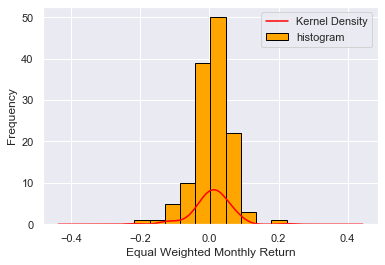

In [22]:
Object.Plot_hist_equal_return()

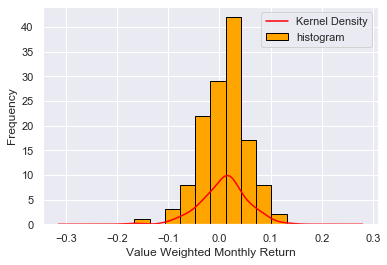

In [23]:
Object.Plot_hist_value_return()

## Show cumulative monthly return -Time Series

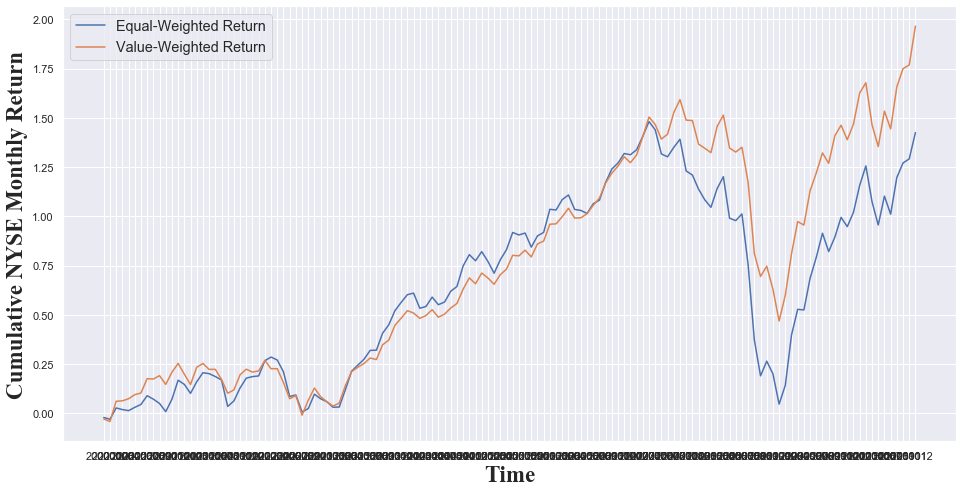

In [86]:
Object.Compare_two_time_series()